In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
df = pd.read_csv("2016-building-energy-benchmarking.csv")
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


### Exploratory Data Analysis

#### Reading Dataset

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
df.tail().T

,3371,3372,3373,3374,3375
OSEBuildingID,50222,50223,50224,50225,50226
DataYear,2016,2016,2016,2016,2016
BuildingType,Nonresidential COS,Nonresidential COS,Nonresidential COS,Nonresidential COS,Nonresidential COS
PrimaryPropertyType,Office,Other,Other,Mixed Use Property,Mixed Use Property
PropertyName,Horticulture building,International district/Chinatown CC,Queen Anne Pool,South Park Community Center,Van Asselt Community Center
Address,1600 S Dakota St,719 8th Ave S,1920 1st Ave W,8319 8th Ave S,2820 S Myrtle St
City,Seattle,Seattle,Seattle,Seattle,Seattle
State,WA,WA,WA,WA,WA
ZipCode,NaN,NaN,NaN,NaN,NaN
TaxParcelIdentificationNumber,1624049080,3558300000,1794501150,7883603155,7857002030


In [5]:
df.shape

(3376, 46)

In [6]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

#### Data information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

#### Statistical Properties of Dataset

#### Deleting Unused Columns

In [8]:
df.drop(['DataYear', 'City', 'State', 'ZipCode','ListOfAllPropertyUseTypes','Electricity(kWh)', 
        'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'NaturalGas(therms)',
         'Address', 'YearsENERGYSTARCertified', 'Comments', 'Latitude', 'Longitude', 'Outlier', 'DefaultData',
          'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)'  ],
       axis=1, inplace=True)

In [9]:
df.drop([578, 2670], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3374 entries, 0 to 3375
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3374 non-null   int64  
 1   BuildingType                     3374 non-null   object 
 2   PrimaryPropertyType              3374 non-null   object 
 3   PropertyName                     3374 non-null   object 
 4   Neighborhood                     3374 non-null   object 
 5   YearBuilt                        3374 non-null   int64  
 6   NumberofBuildings                3368 non-null   float64
 7   NumberofFloors                   3374 non-null   int64  
 8   PropertyGFATotal                 3374 non-null   int64  
 9   PropertyGFAParking               3374 non-null   int64  
 10  PropertyGFABuilding(s)           3374 non-null   int64  
 11  LargestPropertyUseType           3356 non-null   object 
 12  LargestPropertyUseTypeGFA

In [11]:
df.describe()

,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3374.000000,3374.00000,3368.000000,3374.000000,3.374000e+03,3374.000000,3.374000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3367.000000,3.371000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3367.000000,3367.000000
mean,21213.470362,1968.59840,1.106888,4.710136,9.486488e+04,8006.269117,8.685861e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,134.232848,5.403667e+06,2.745959e+05,3.707612e+06,1.368505e+06,119.723971,1.175916
std,12221.971913,33.08168,2.108402,5.495882,2.188981e+05,32335.719122,2.079979e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,139.287554,2.161063e+07,3.912173e+06,1.485066e+07,6.709781e+06,538.832227,1.821452
min,1.000000,1900.00000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,19991.250000,1948.00000,1.000000,2.000000,2.849400e+04,0.000000,2.776250e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,74.699997,9.251286e+05,0.000000e+00,6.394870e+05,0.000000e+00,9.495000,0.210000
50%,23112.000000,1975.00000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,96.199997,1.803753e+06,0.000000e+00,1.177583e+06,3.237540e+05,33.920000,0.610000
75%,25993.500000,1997.00000,1.000000,5.000000,9.105800e+04,0.000000,8.434875e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,143.899994,4.222455e+06,0.000000e+00,2.829632e+06,1.189034e+06,93.940000,1.370000
max,50226.000000,2015.00000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


In [12]:
missing_values = df.isnull().sum()
missing_values

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     6
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType               18
LargestPropertyUseTypeGFA            18
SecondLargestPropertyUseType       1695
SecondLargestPropertyUseTypeGFA    1695
ThirdLargestPropertyUseType        2778
ThirdLargestPropertyUseTypeGFA     2778
ENERGYSTARScore                     841
SiteEUI(kBtu/sf)                      5
SourceEUI(kBtu/sf)                    7
SiteEnergyUse(kBtu)                   3
SteamUse(kBtu)                        7
Electricity(kBtu)                     7
NaturalGas(kBtu)                      7
ComplianceStatus                      0


In [13]:
df.shape

(3374, 27)

##### Selecting Building Type

In [14]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [15]:
df['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse',
       'Other - Mall', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient', nan,
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Indust

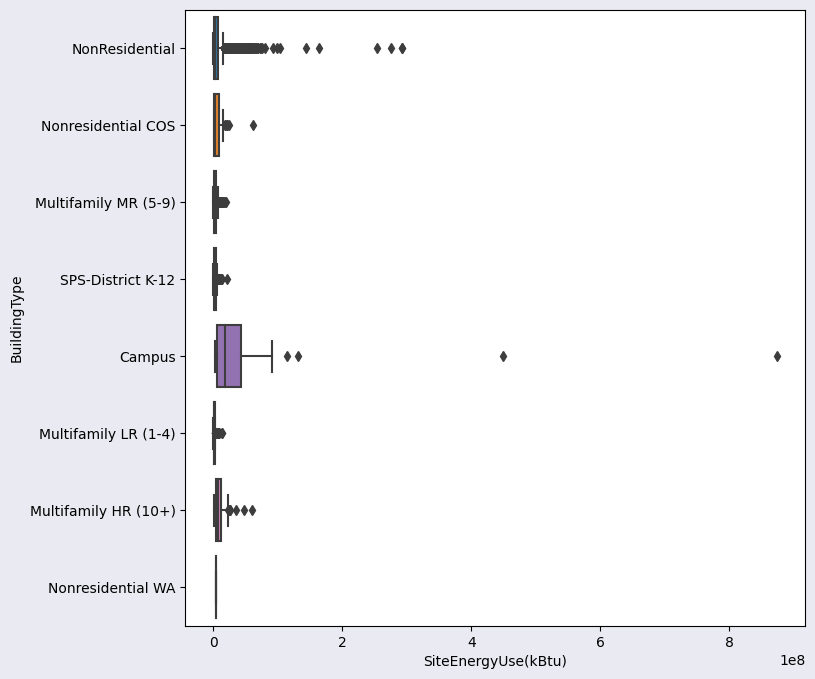

In [16]:
plt.figure(figsize=(8,8), facecolor="#eaeaf2")
sns.boxplot(data=df, y='BuildingType', x='SiteEnergyUse(kBtu)');

In [17]:
building_dictionary = {
                'NonResidential': 'NonResidential',
                'Nonresidential COS': 'NonResidential',
                'Multifamily MR (5-9)': 'Residential',
                'SPS-District K-12': 'NonResidential',
                'Campus': 'NonResidential',
                'Multifamily LR (1-4)': 'Residential',
                'Multifamily HR (10+)': 'Residential',
                'Nonresidential WA': 'NonResidential'
                }

df['BuildingType'] = df['BuildingType'].map(building_dictionary)

In [18]:
df = df[df['BuildingType'] != 'Residential'].copy()

In [19]:
df.shape

(1666, 27)

#### Override NaN values of ENERGYSTARScore

In [20]:
missing_stars_values = df['ENERGYSTARScore'].isnull().sum()
missing_stars_values

572

In [21]:
df['ENERGYSTARScore']

0       60.0
1       61.0
2       43.0
3       56.0
4       75.0
        ... 
3371    46.0
3372     NaN
3373     NaN
3374     NaN
3375     NaN
Name: ENERGYSTARScore, Length: 1666, dtype: float64

In [22]:
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = colonnes_numeriques.corr()['ENERGYSTARScore']
correlation_matrix

OSEBuildingID                     -0.047328
YearBuilt                         -0.033748
NumberofBuildings                 -0.035865
NumberofFloors                     0.121438
PropertyGFATotal                   0.123219
PropertyGFAParking                 0.093314
PropertyGFABuilding(s)             0.117446
LargestPropertyUseTypeGFA          0.111274
SecondLargestPropertyUseTypeGFA    0.131246
ThirdLargestPropertyUseTypeGFA    -0.041437
ENERGYSTARScore                    1.000000
SiteEUI(kBtu/sf)                  -0.350665
SourceEUI(kBtu/sf)                -0.297920
SiteEnergyUse(kBtu)               -0.080135
SteamUse(kBtu)                    -0.039023
Electricity(kBtu)                 -0.028411
NaturalGas(kBtu)                  -0.117790
TotalGHGEmissions                 -0.108145
GHGEmissionsIntensity             -0.297997
Name: ENERGYSTARScore, dtype: float64

In [23]:
moyenne = df['ENERGYSTARScore'].mean()
df['ENERGYSTARScore'] = df['ENERGYSTARScore'].fillna(moyenne)
moyenne 

65.44972577696527

In [24]:
df['NumberofBuildings'].fillna(method='ffill', inplace=True)

df['ThirdLargestPropertyUseType'].fillna("Inconnu", inplace=True)
df['SecondLargestPropertyUseType'].fillna("Inconnu", inplace=True)
df['LargestPropertyUseType'].fillna("None", inplace=True)

In [25]:
moyenne = df['SecondLargestPropertyUseTypeGFA'].mean()
df['SecondLargestPropertyUseTypeGFA'] = df['SecondLargestPropertyUseTypeGFA'].fillna(moyenne)
moyenne 

36804.1605811462

In [26]:
moyenne = df['ThirdLargestPropertyUseTypeGFA'].mean()
df['ThirdLargestPropertyUseTypeGFA'] = df['ThirdLargestPropertyUseTypeGFA'].fillna(moyenne)
moyenne 

14923.139939614732

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(1661, 27)

In [29]:
df.head(5)

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,Inconnu,36804.160581,Inconnu,14923.13994,60.0,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,Compliant,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.000000,Restaurant,4622.00000,61.0,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,Compliant,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,Inconnu,36804.160581,Inconnu,14923.13994,43.0,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,Compliant,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,Inconnu,36804.160581,Inconnu,14923.13994,56.0,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,Compliant,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.000000,Swimming Pool,0.00000,75.0,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,Compliant,505.01,2.88


In [30]:
missing_values = df.isnull().sum()
missing_values

OSEBuildingID                      0
BuildingType                       0
PrimaryPropertyType                0
PropertyName                       0
Neighborhood                       0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseType       0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseType        0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEUI(kBtu/sf)                   0
SourceEUI(kBtu/sf)                 0
SiteEnergyUse(kBtu)                0
SteamUse(kBtu)                     0
Electricity(kBtu)                  0
NaturalGas(kBtu)                   0
ComplianceStatus                   0
TotalGHGEmissions                  0
GHGEmissionsIntensity              0
d

In [31]:
# Effacer apres nettoyage
df['SiteEUI(kBtu/sf)'].head(30)

0      81.699997
1      94.800003
2      96.000000
3     110.800003
4     114.800003
5     136.100006
6      70.800003
7      61.299999
8      83.699997
10    119.599998
11     80.000000
12    101.500000
13     75.500000
14    159.500000
15     50.799999
16     76.599998
17     96.300003
18    132.399994
19     97.300003
20     83.699997
21    124.199997
22     26.100000
23     63.200001
24     90.699997
25     19.500000
26     45.500000
27     85.800003
28      0.000000
29     92.900002
30     41.299999
Name: SiteEUI(kBtu/sf), dtype: float64

In [32]:
# Effacer apres nettoyage
lignes_nan = df[df['YearBuilt'].isnull()]
lignes_nan

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity


In [33]:
df.shape

(1661, 27)

In [34]:
df = df[df['SiteEUI(kBtu/sf)'] != 0]

#### Data Visualization

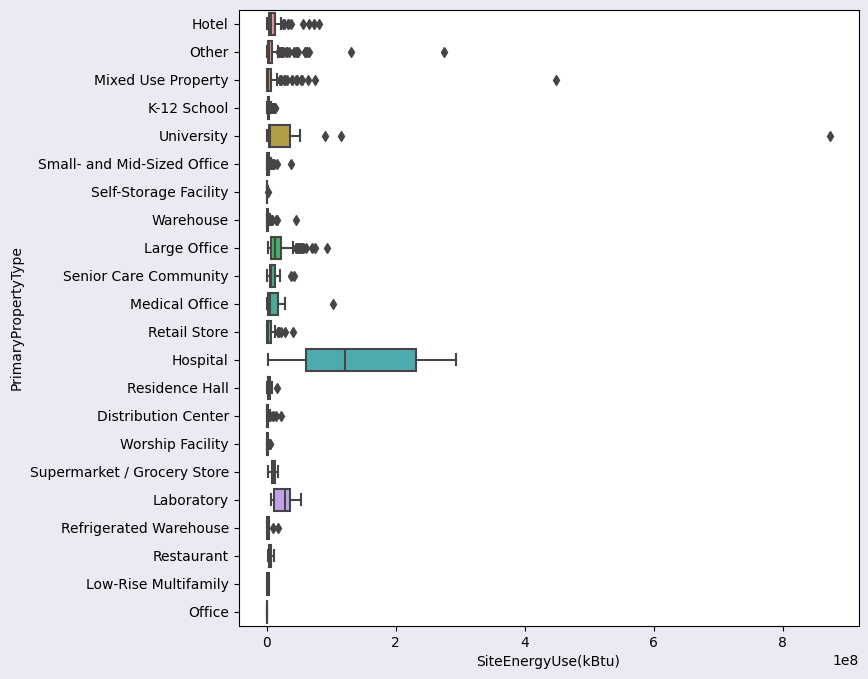

In [35]:
plt.figure(figsize=(8,8), facecolor="#eaeaf2")
sns.boxplot(data=df, y='PrimaryPropertyType', x='SiteEnergyUse(kBtu)');

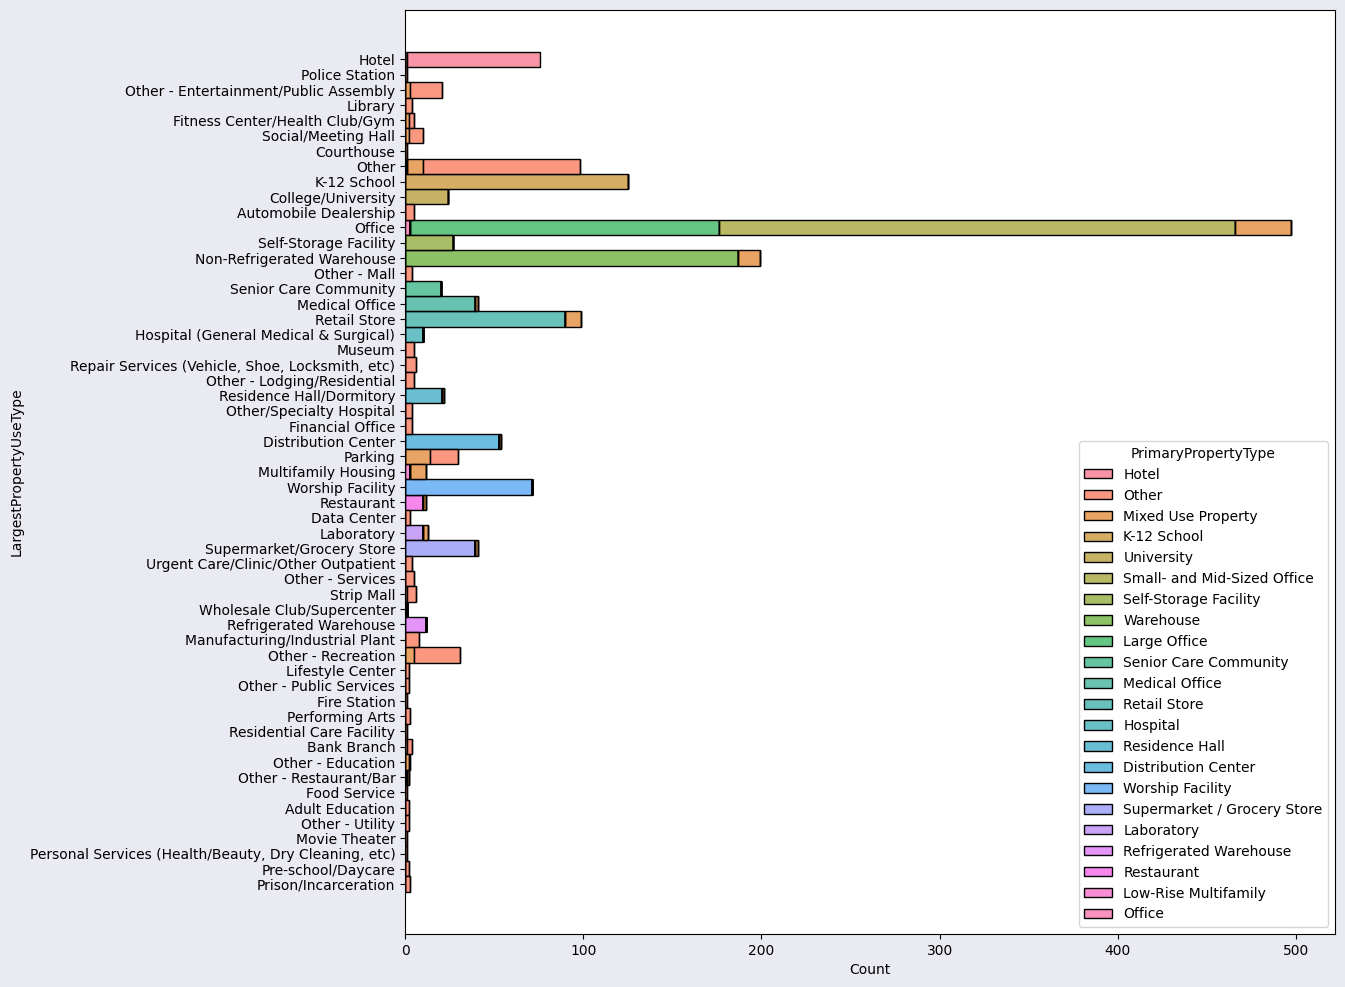

In [36]:
plt.figure(figsize=(12,12), facecolor="#eaeaf2")
sns.histplot(data=df, y='LargestPropertyUseType', hue='PrimaryPropertyType',
            multiple='stack');

<Axes: xlabel='SiteEUI(kBtu/sf)', ylabel='PrimaryPropertyType'>

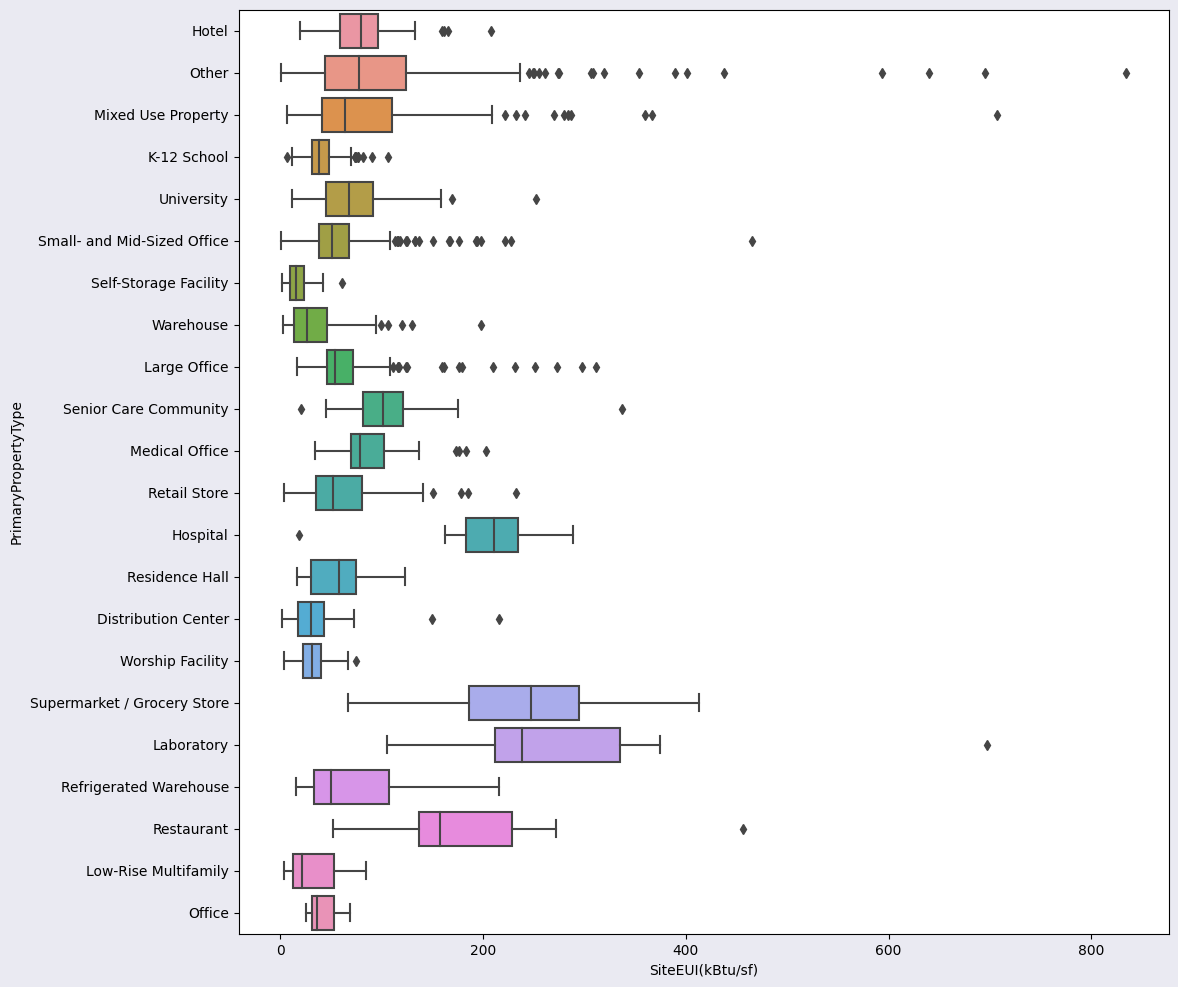

In [37]:
plt.figure(figsize=(12,12), facecolor="#eaeaf2")
sns.boxplot(data=df, y='PrimaryPropertyType', x='SiteEUI(kBtu/sf)')

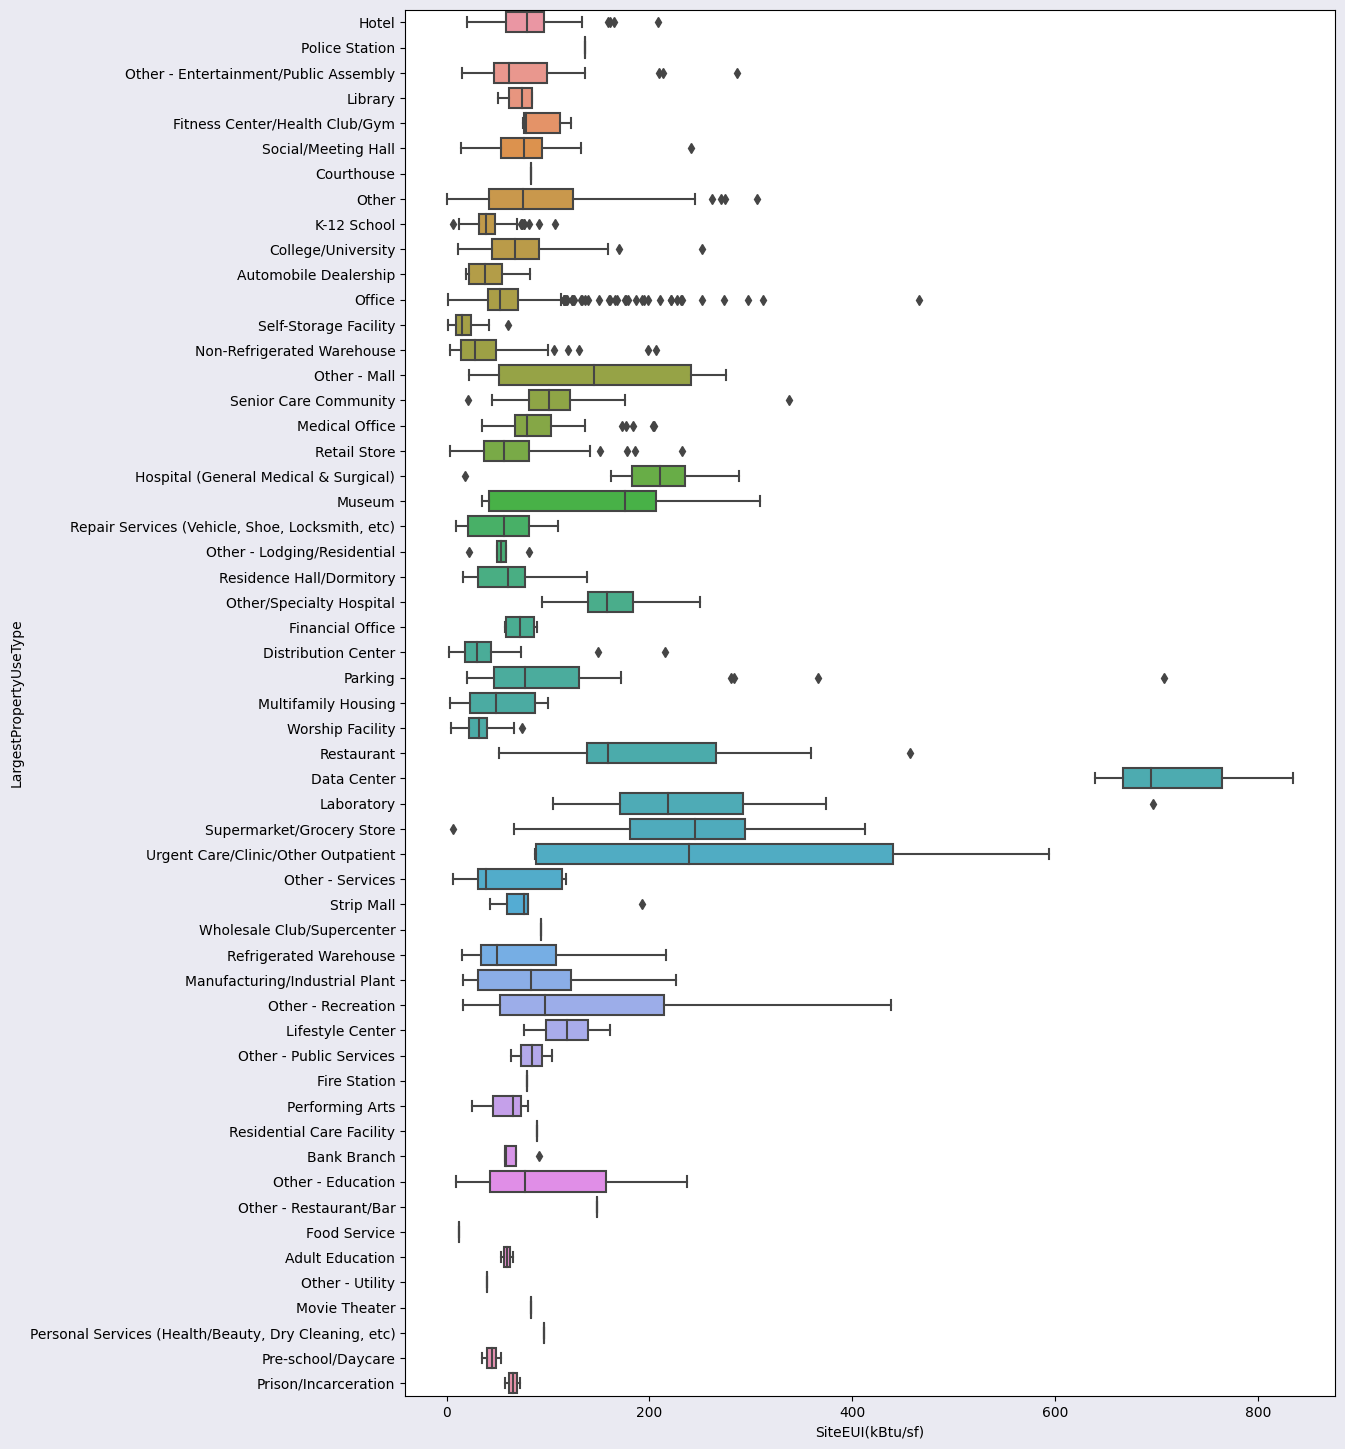

In [38]:
plt.figure(figsize=(12,18), facecolor="#eaeaf2")
sns.boxplot(data=df, y='LargestPropertyUseType', x='SiteEUI(kBtu/sf)');

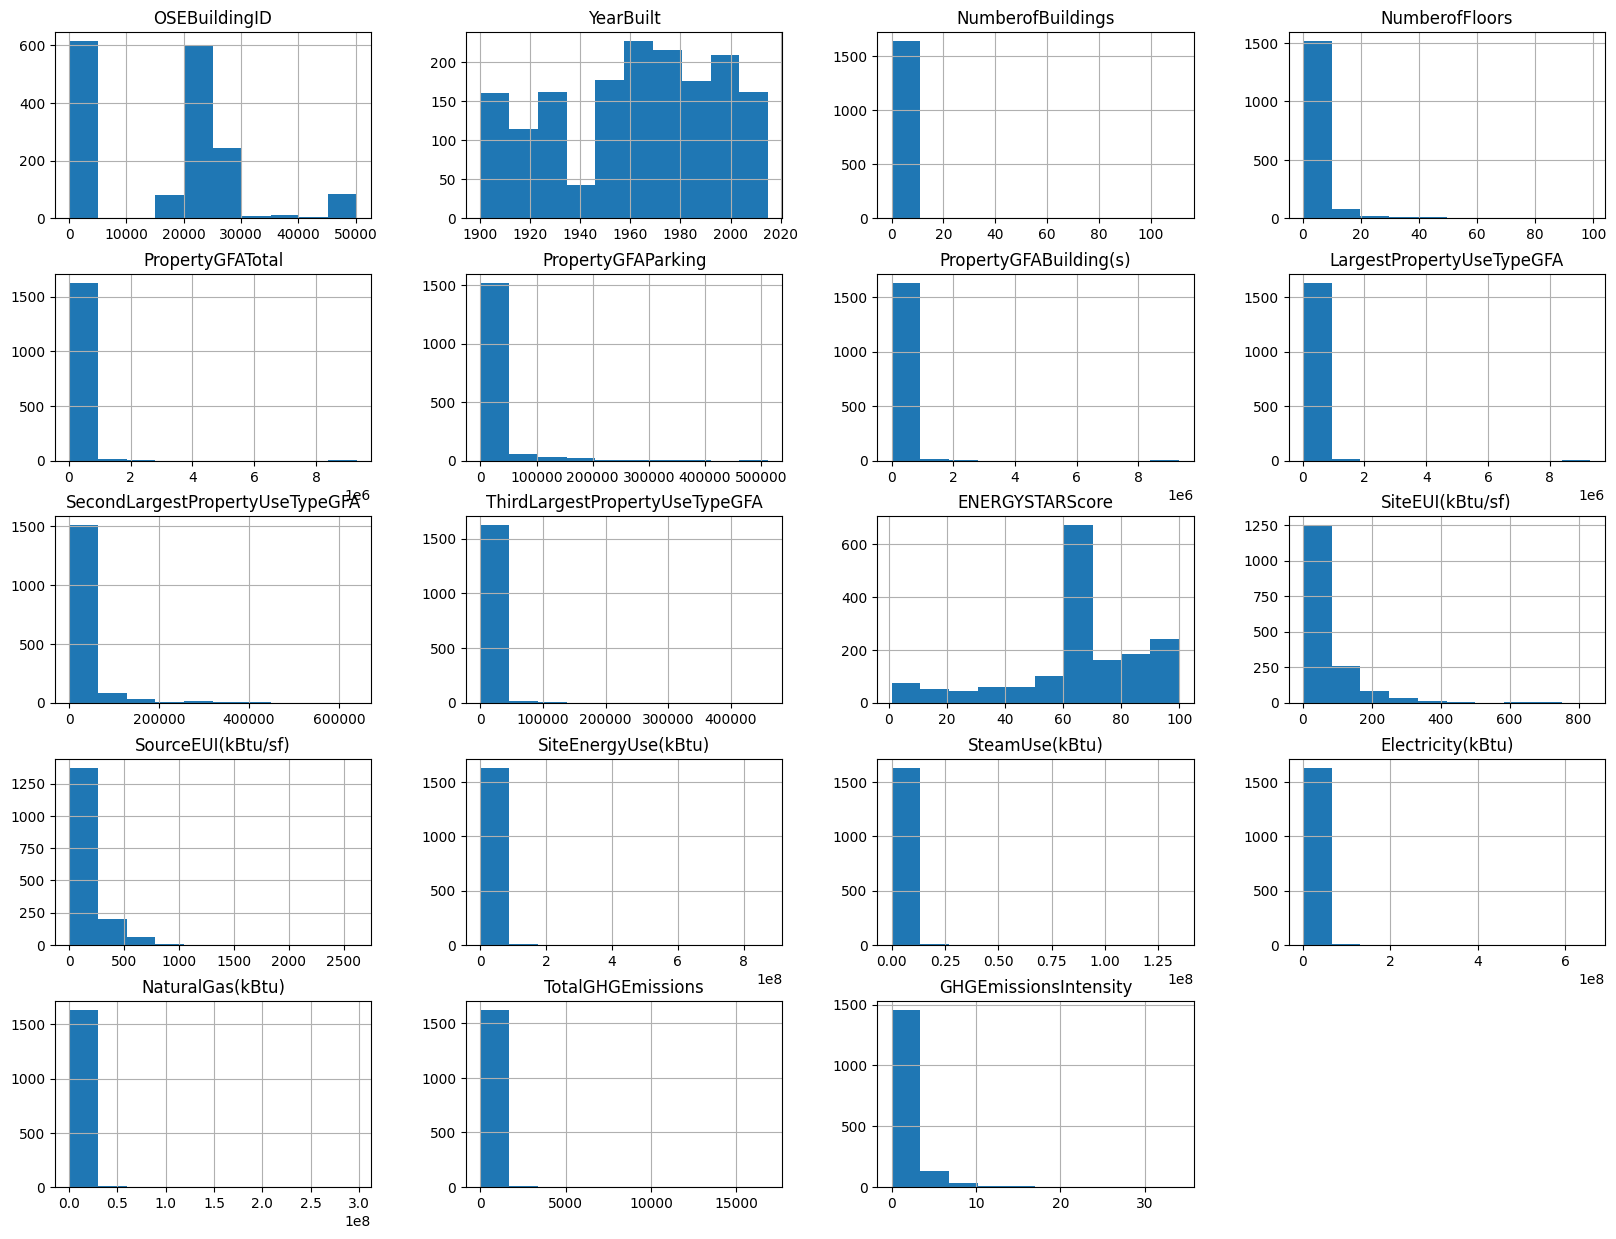

In [39]:
df.hist(figsize=(20,15))
plt.show()

In [40]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [41]:
df.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,Inconnu,36804.160581,Inconnu,14923.13994,60.0,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,Compliant,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.000000,Restaurant,4622.00000,61.0,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,Compliant,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,Inconnu,36804.160581,Inconnu,14923.13994,43.0,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,Compliant,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,Inconnu,36804.160581,Inconnu,14923.13994,56.0,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,Compliant,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.000000,Swimming Pool,0.00000,75.0,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,Compliant,505.01,2.88


In [42]:
df['SteamRatio'] = df['SteamUse(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['ElectricityRatio'] = df['Electricity(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['NaturalGasRatio'] = df['NaturalGas(kBtu)'] / df['SiteEnergyUse(kBtu)']

In [43]:

# Créer une table pivotante pour les ratios d'énergie par PrimaryPropertyType
ratios_by_building_type = df.pivot_table(index='PrimaryPropertyType', values=['SteamRatio', 'ElectricityRatio', 'NaturalGasRatio'], aggfunc='mean')

print(ratios_by_building_type)


                             ElectricityRatio  NaturalGasRatio  SteamRatio
PrimaryPropertyType                                                       
Distribution Center                  0.692867         0.307133    0.000000
Hospital                             0.552528         0.314308    0.133163
Hotel                                0.509073         0.417375    0.073552
K-12 School                          0.515151         0.482686    0.002015
Laboratory                           0.562292         0.379344    0.058365
Large Office                         0.895733         0.059888    0.040165
Low-Rise Multifamily                 0.659471         0.340528    0.000000
Medical Office                       0.821162         0.140085    0.038753
Mixed Use Property                   0.695058         0.288861    0.009708
Office                               0.777542         0.222458    0.000000
Other                                0.645618         0.317130    0.033868
Refrigerated Warehouse   

In [44]:
# Créer une table pivotante pour les ratios d'énergie par SecondLargestPropertyUseType
ratios_by_building_type = df.pivot_table(index='SecondLargestPropertyUseType', values=['SteamRatio', 'ElectricityRatio', 'NaturalGasRatio'], aggfunc='mean')

print(ratios_by_building_type)

                                                    ElectricityRatio  \
SecondLargestPropertyUseType                                           
Adult Education                                             0.970515   
Automobile Dealership                                       0.875863   
Bank Branch                                                 0.773539   
Bar/Nightclub                                               0.541431   
College/University                                          0.882463   
Convenience Store without Gas Station                       1.000000   
Courthouse                                                  0.623867   
Data Center                                                 0.919584   
Distribution Center                                         0.661525   
Enclosed Mall                                               0.881663   
Financial Office                                            0.743044   
Fitness Center/Health Club/Gym                              0.47

In [45]:
# Créer une table pivotante pour les ratios d'énergie par PrimaryPropertyType
ratios_by_building_type = df.pivot_table(index='ThirdLargestPropertyUseType', values=['SteamRatio', 'ElectricityRatio', 'NaturalGasRatio'], aggfunc='mean')

print(ratios_by_building_type)

                                                    ElectricityRatio  \
ThirdLargestPropertyUseType                                            
Bank Branch                                                 0.866277   
Bar/Nightclub                                               0.789803   
Convenience Store without Gas Station                       0.787754   
Data Center                                                 0.934465   
Distribution Center                                         0.848499   
Fast Food Restaurant                                        0.747996   
Financial Office                                            0.858393   
Fitness Center/Health Club/Gym                              0.937405   
Food Service                                                0.678225   
Hotel                                                       0.746963   
Inconnu                                                     0.682216   
K-12 School                                                 0.55

In [46]:
# Créer une table pivotante pour les ratios d'énergie par SecondLargestPropertyUseType
ratios_by_building_type = df.pivot_table(index='YearBuilt', values=['SteamRatio', 'ElectricityRatio', 'NaturalGasRatio'], aggfunc='mean')

print(ratios_by_building_type)

           ElectricityRatio  NaturalGasRatio  SteamRatio
YearBuilt                                               
1900               0.709379         0.239354    0.047987
1901               0.674133         0.325867    0.000000
1902               0.723749         0.276251    0.000000
1903               0.828283         0.171707    0.000000
1904               0.671086         0.285100    0.043814
...                     ...              ...         ...
2011               0.658325         0.341675    0.000000
2012               0.802931         0.141918    0.054445
2013               0.622268         0.294179    0.000000
2014               0.836978         0.158857    0.000000
2015               0.799759         0.200241    0.000000

[113 rows x 3 columns]


In [47]:
# Créer une table pivotante pour les ratios d'énergie par SecondLargestPropertyUseType
ratios_by_building_type = df.pivot_table(index='ENERGYSTARScore', values=['SteamRatio', 'ElectricityRatio', 'NaturalGasRatio'], aggfunc='mean')

print(ratios_by_building_type)


                 ElectricityRatio  NaturalGasRatio  SteamRatio
ENERGYSTARScore                                               
1.0                      0.747577         0.206085    0.021758
2.0                      0.847994         0.152006    0.000000
3.0                      0.763555         0.236445    0.000000
4.0                      0.898831         0.101169    0.000000
5.0                      0.777491         0.222509    0.000000
...                           ...              ...         ...
96.0                     0.701459         0.254553    0.043979
97.0                     0.725647         0.255161    0.019192
98.0                     0.608161         0.355679    0.036157
99.0                     0.778844         0.221156    0.000000
100.0                    0.713509         0.210782    0.000000

[101 rows x 3 columns]


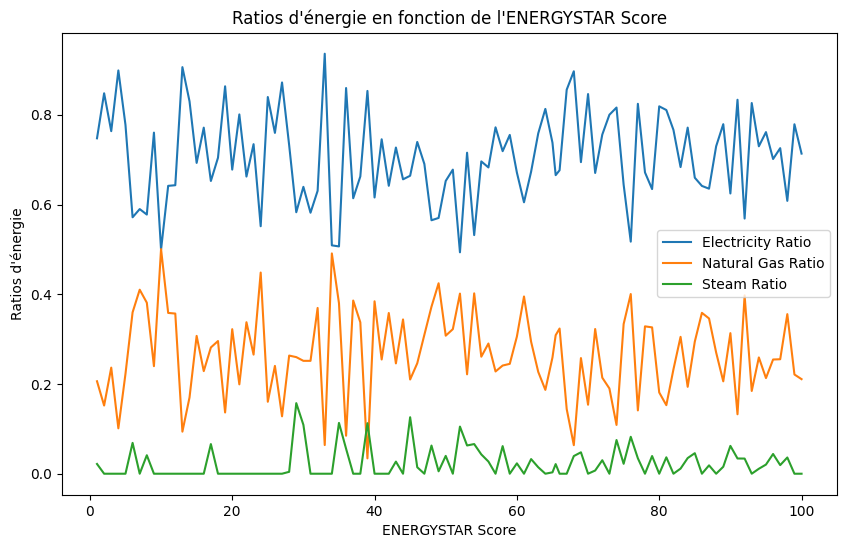

In [48]:
# Créer le graphique linéaire pour les ratios d'énergie en fonction de l'ENERGYSTARScore
plt.figure(figsize=(10, 6))
plt.plot(ratios_by_building_type.index, ratios_by_building_type['ElectricityRatio'], label='Electricity Ratio')
plt.plot(ratios_by_building_type.index, ratios_by_building_type['NaturalGasRatio'], label='Natural Gas Ratio')
plt.plot(ratios_by_building_type.index, ratios_by_building_type['SteamRatio'], label='Steam Ratio')
plt.xlabel('ENERGYSTAR Score')
plt.ylabel('Ratios d\'énergie')
plt.title('Ratios d\'énergie en fonction de l\'ENERGYSTAR Score')
plt.legend()
plt.show()

In [49]:
# SiteEUI(kBtu/sf -> la quantité annuelle de toute l’énergie consommée par la propriété sur le site, telle que déclarée sur les factures de services publics.
# SourceEUI(kBtu/sf) -> la consommation d’énergie à la source d’une propriété divisée par sa superficie de plancher brute par annee
# SiteEnergyUse(kBtu) -> La quantité annuelle d’énergie consommée par la propriété à partir de toutes les sources d’énergie.

#### Buildings Surface

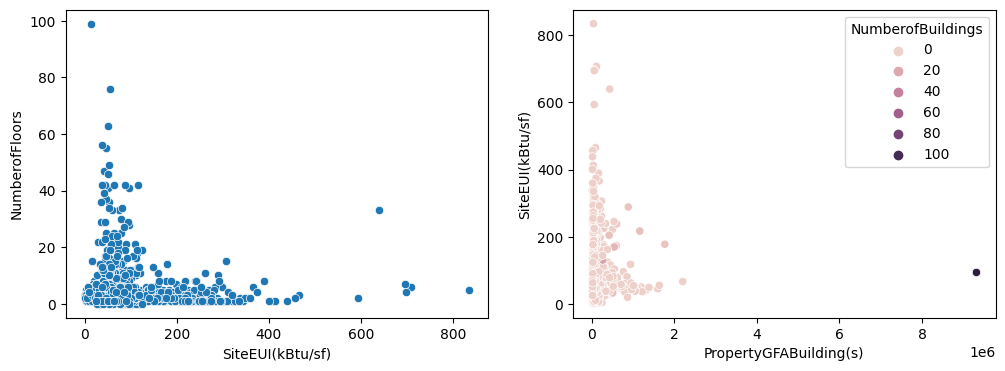

In [50]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.scatterplot(data=df, x='SiteEUI(kBtu/sf)', y='NumberofFloors', ax=ax[0])
sns.scatterplot(data=df, x='PropertyGFABuilding(s)', y='SiteEUI(kBtu/sf)', hue='NumberofBuildings', ax=ax[1]);

In [51]:
df['NumberofFloors'].value_counts(ascending=True)

NumberofFloors
39      1
47      1
99      1
63      1
37      1
55      1
28      1
46      1
49      1
27      1
30      1
56      1
76      1
34      2
36      2
41      2
29      3
22      3
23      3
16      3
21      3
20      3
24      3
18      3
33      3
25      3
17      4
42      5
19      5
15      6
13      7
9       8
12      9
14      9
0      16
10     18
11     18
8      21
7      34
6      83
5     102
4     144
3     265
2     385
1     458
Name: count, dtype: int64

In [52]:
lignes_floors_0= df[df['NumberofFloors'] == 0]
lignes_floors_0

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SteamRatio,ElectricityRatio,NaturalGasRatio
166,267,NonResidential,Hotel,Grand Hyatt Seattle,DOWNTOWN,1999,1.0,0,934292,0,934292,Hotel,495536.0,Parking,438756.000000,Restaurant,49700.00000,65.449726,117.900002,272.899994,6.504728e+07,0.0,39364114.0,25683162.0,Compliant,1638.46,1.75,0.000000,0.605162,0.394838
487,656,NonResidential,Medical Office,Arnold Pavilion,EAST,2004,1.0,0,225982,0,225982,Medical Office,200184.0,Inconnu,36804.160581,Inconnu,14923.13994,53.000000,102.699997,246.899994,2.056062e+07,7815663.0,12744957.0,0.0,Compliant,692.12,3.06,0.380128,0.619872,0.000000
488,657,NonResidential,Mixed Use Property,2200 Westlake - SEDO,DOWNTOWN,2006,0.0,0,516407,0,516407,Parking,385196.0,Multifamily Housing,340236.000000,Hotel,67627.00000,31.000000,76.300003,199.199997,3.940332e+07,0.0,29432803.0,9970512.0,Compliant,734.72,1.42,0.000000,0.746963,0.253037
564,758,NonResidential,Other,Pacific Place,DOWNTOWN,1999,1.0,0,947987,0,947987,Other - Mall,561684.0,Other - Entertainment/Public Assembly,100000.000000,Restaurant,80000.00000,65.449726,62.299999,195.600006,4.651096e+07,0.0,46510954.0,0.0,Compliant,324.25,0.34,0.000000,1.000000,0.000000
1754,23311,NonResidential,Medical Office,HART First Hill LLC,EAST,1945,1.0,0,274568,0,274568,Medical Office,228133.0,Parking,135954.000000,Inconnu,14923.13994,52.000000,111.000000,235.500000,2.531153e+07,13296249.0,12015275.0,0.0,Compliant,1110.07,4.04,0.525304,0.474696,0.000000
1993,24086,NonResidential,Other,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,GREATER DUWAMISH,1991,10.0,0,230971,0,230971,Other,230970.0,Parking,0.000000,Inconnu,14923.13994,65.449726,91.000000,235.100006,2.102229e+07,0.0,15419770.0,5602515.0,Compliant,405.05,1.75,0.000000,0.733496,0.266504
3130,40028,NonResidential,Warehouse,Sandpoint #5,NORTHEAST,1940,1.0,0,384772,0,384772,Non-Refrigerated Warehouse,349953.0,Office,63872.000000,Inconnu,14923.13994,69.000000,36.700001,84.099998,1.520676e+07,0.0,9014872.0,6191888.0,Compliant,391.70,1.02,0.000000,0.592820,0.407180
3131,40031,NonResidential,Medical Office,Sandpoint #25,NORTHEAST,1960,1.0,0,30287,0,30287,Medical Office,28050.0,Inconnu,36804.160581,Inconnu,14923.13994,32.000000,78.199997,217.399994,2.193115e+06,0.0,1815405.0,377710.0,Compliant,32.72,1.08,0.000000,0.827775,0.172225
3132,40034,NonResidential,Small- and Mid-Sized Office,Sandpoint #29,NORTHEAST,1960,1.0,0,21931,0,21931,Office,31845.0,Office,31845.000000,Inconnu,14923.13994,32.000000,124.000000,221.899994,3.947209e+06,0.0,1398591.0,2548619.0,Compliant,145.11,6.62,0.000000,0.354324,0.645676
3168,49705,NonResidential,Other,Magnuson,NORTHEAST,1929,8.0,0,502030,0,502030,Other - Recreation,564258.0,Inconnu,36804.160581,Inconnu,14923.13994,65.449726,32.700001,69.000000,1.847034e+07,0.0,9359884.0,9110455.0,Compliant,549.11,1.09,0.000000,0.506752,0.493248


In [53]:
df['NumberofFloors'] = df['NumberofFloors'].replace(0,1)

In [54]:
lignes_floors_0= df[df['NumberofBuildings'] == 0]
lignes_floors_0

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SteamRatio,ElectricityRatio,NaturalGasRatio
63,89,NonResidential,Medical Office,Polyclinic North && South,EAST,1965,0.0,3,179014,0,179014,Medical Office,179014.0,Inconnu,36804.160581,Inconnu,14923.13994,48.000000,93.300003,213.399994,1.670106e+07,0.000000e+00,9886484.0,6814570.0,Compliant,430.84,2.41,0.000000,0.591968,0.408032
76,113,NonResidential,Small- and Mid-Sized Office,KCTS9,MAGNOLIA / QUEEN ANNE,1986,0.0,2,66240,2352,63888,Office,45900.0,Data Center,5181.000000,Distribution Center,4551.00000,65.449726,74.900002,235.199997,4.166306e+06,0.000000e+00,4166305.0,0.0,Compliant,29.04,0.44,0.000000,1.000000,0.000000
160,257,NonResidential,Warehouse,Harbor Island: Warehouse E - DNRP-SWD,GREATER DUWAMISH,1916,0.0,4,79600,0,79600,Non-Refrigerated Warehouse,79600.0,Inconnu,36804.160581,Inconnu,14923.13994,34.000000,30.299999,95.099998,2.411402e+06,0.000000e+00,2411402.0,0.0,Compliant,16.81,0.21,0.000000,1.000000,0.000000
201,322,NonResidential,Large Office,Cox Media Group Seattle KIRO TV (322),DOWNTOWN,1968,0.0,3,100734,26731,74003,Office,100734.0,Inconnu,36804.160581,Inconnu,14923.13994,20.000000,97.199997,305.100006,9.788717e+06,0.000000e+00,9788716.0,0.0,Compliant,68.24,0.68,0.000000,1.000000,0.000000
241,366,NonResidential,Small- and Mid-Sized Office,University District Office Buiding,NORTHEAST,1961,0.0,5,99005,0,99005,Office,79555.0,Inconnu,36804.160581,Inconnu,14923.13994,70.000000,59.400002,137.600006,4.728488e+06,0.000000e+00,2863212.0,1865277.0,Compliant,119.03,1.20,0.000000,0.605524,0.394476
264,391,NonResidential,Mixed Use Property,Thaw Building,GREATER DUWAMISH,1970,0.0,1,88400,0,88400,Non-Refrigerated Warehouse,33450.0,Office,29620.000000,Distribution Center,27715.00000,42.000000,48.299999,109.000000,4.383100e+06,0.000000e+00,2530658.0,1852442.0,Compliant,116.03,1.31,0.000000,0.577367,0.422633
278,408,NonResidential,Large Office,Fourth and Pike Building,DOWNTOWN,1926,0.0,10,132326,0,132326,Office,92006.0,Other,12610.000000,Retail Store,9835.00000,72.000000,52.700001,159.800003,6.029020e+06,3.282471e+05,5698221.0,2551.0,Compliant,65.20,0.49,0.054445,0.945132,0.000423
280,410,NonResidential,Hotel,Motif Seattle,DOWNTOWN,1973,0.0,19,332067,59280,272787,Hotel,332067.0,Inconnu,36804.160581,Inconnu,14923.13994,6.000000,113.800003,251.300003,3.778555e+07,1.558601e+07,19800542.0,2398995.0,Compliant,1468.50,4.42,0.412486,0.524024,0.063490
291,421,NonResidential,Other,Meridian (East),DOWNTOWN,1996,0.0,4,267335,166960,100375,Parking,166960.0,Movie Theater,69947.000000,Other - Restaurant/Bar,27400.00000,65.449726,74.699997,189.399994,7.273156e+06,0.000000e+00,5169902.0,2103253.0,Compliant,147.75,0.55,0.000000,0.710820,0.289180
358,504,NonResidential,Other,Westbridge,DELRIDGE,1955,0.0,1,113780,0,113780,Other - Services,91532.0,Office,22248.000000,Inconnu,14923.13994,65.449726,31.400000,60.000000,3.574542e+06,0.000000e+00,1470885.0,2103657.0,Compliant,121.98,1.07,0.000000,0.411489,0.588511


In [55]:
df['NumberofBuildings'] = df['NumberofBuildings'].replace(0,1)
df['NumberofFloors'] = df['NumberofFloors'].replace(0,1)

In [56]:
df['SurfacePerBuilding'] = df['PropertyGFABuilding(s)'] / df['NumberofBuildings']
df['SurfacePerFloor'] = df['PropertyGFABuilding(s)'] / df['NumberofFloors']

In [57]:
df['ParkingRatio'] = df['PropertyGFAParking'] / df['PropertyGFATotal']
df['BuildingRatio'] = df['PropertyGFABuilding(s)'] / df['PropertyGFATotal']

#### Correlations between the variables

#### Make a correlation matrix

In [58]:
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = colonnes_numeriques.corr()
correlation_matrix

,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,SteamRatio,ElectricityRatio,NaturalGasRatio,SurfacePerBuilding,SurfacePerFloor,ParkingRatio,BuildingRatio
OSEBuildingID,1.000000,0.000984,0.047134,-0.254620,-0.149130,-0.221072,-0.123048,-0.111579,-0.163037,-0.078853,-0.037650,-0.008414,-0.048056,-0.089344,-0.012200,-0.102232,-0.075358,-0.076490,0.080885,-0.090866,-0.112306,0.135965,-0.284004,0.024284,-0.190590,0.190590
YearBuilt,0.000984,1.000000,-0.030649,0.096614,0.102061,0.279231,0.065069,0.068818,0.193710,0.076793,-0.024617,0.125695,0.160445,0.063973,-0.003768,0.074923,0.058314,0.050905,-0.008322,-0.128385,0.160469,-0.116963,0.169803,-0.021597,0.342583,-0.342583
NumberofBuildings,0.047134,-0.030649,1.000000,-0.020220,0.740797,-0.012434,0.777398,0.801671,0.032802,0.002426,-0.006790,0.030812,0.027288,0.715179,0.409157,0.759743,0.063151,0.419889,0.029654,0.024450,-0.007733,-0.015207,-0.016299,0.914822,-0.021107,0.021107
NumberofFloors,-0.254620,0.096614,-0.020220,1.000000,0.411551,0.503163,0.355569,0.338899,0.445537,0.176031,0.117161,0.022365,0.062407,0.222836,0.094371,0.285168,0.035029,0.131583,-0.049784,0.153400,0.161143,-0.213227,0.641498,-0.037908,0.192515,-0.192515
PropertyGFATotal,-0.149130,0.102061,0.740797,0.411551,1.000000,0.377877,0.990359,0.977642,0.472155,0.225703,0.069161,0.034870,0.054419,0.809464,0.455527,0.867503,0.155414,0.527977,-0.008252,0.080057,0.091979,-0.129337,0.601745,0.807645,0.136550,-0.136550
PropertyGFAParking,-0.221072,0.279231,-0.012434,0.503163,0.377877,1.000000,0.245982,0.274735,0.449341,0.127394,0.082282,0.054267,0.099871,0.145301,0.001055,0.200365,0.027708,0.057563,-0.093871,-0.020279,0.184035,-0.172528,0.452690,-0.014263,0.671600,-0.671600
PropertyGFABuilding(s),-0.123048,0.065069,0.777398,0.355569,0.990359,0.245982,1.000000,0.982384,0.427068,0.217228,0.060094,0.028386,0.042028,0.825685,0.476732,0.878208,0.158556,0.544125,0.005406,0.086845,0.068758,-0.109590,0.562234,0.847654,0.042472,-0.042472
LargestPropertyUseTypeGFA,-0.111579,0.068818,0.801671,0.338899,0.977642,0.274735,0.982384,1.000000,0.384505,0.163070,0.054418,0.027428,0.037357,0.845951,0.509936,0.888271,0.174577,0.575465,0.030712,0.089622,0.059574,-0.101611,0.496613,0.856739,0.071816,-0.071816
SecondLargestPropertyUseTypeGFA,-0.163037,0.193710,0.032802,0.445537,0.472155,0.449341,0.427068,0.384505,1.000000,0.517895,0.077586,0.038555,0.059971,0.424160,0.241431,0.390698,0.360037,0.450283,0.072359,0.050677,0.093016,-0.108339,0.662211,0.082125,0.163834,-0.163834
ThirdLargestPropertyUseTypeGFA,-0.078853,0.076793,0.002426,0.176031,0.225703,0.127394,0.217228,0.163070,0.517895,1.000000,-0.008679,0.045817,0.048349,0.326472,0.003968,0.234612,0.531203,0.399047,0.193919,-0.007257,0.023078,-0.018110,0.377263,0.041960,0.027399,-0.027399


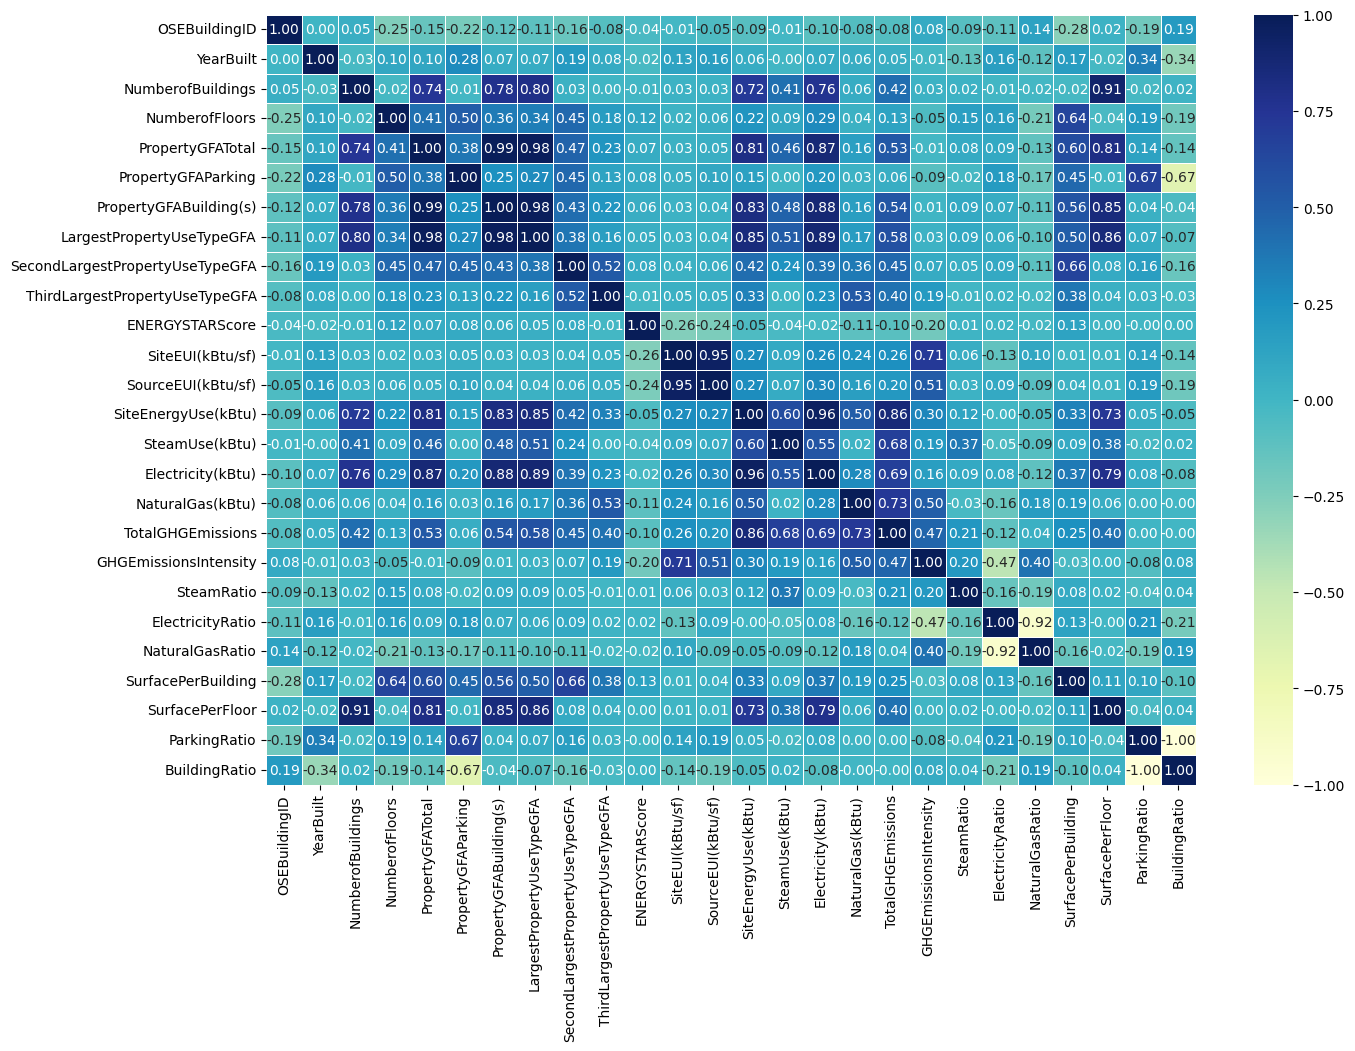

In [59]:
fig, ax = plt.subplots(figsize =(15,10))
ax = sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

In [60]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'SteamRatio', 'ElectricityRatio',
       'NaturalGasRatio', 'SurfacePerBuilding', 'SurfacePerFloor',
       'ParkingRatio', 'BuildingRatio'],
      dtype='object')

In [65]:
df.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SteamRatio,ElectricityRatio,NaturalGasRatio,SurfacePerBuilding,SurfacePerFloor,ParkingRatio,BuildingRatio
0,1,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,Inconnu,36804.160581,Inconnu,14923.13994,60.0,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,Compliant,249.98,2.83,0.277302,0.546060,0.176638,88434.0,7369.500000,0.000000,1.000000
1,2,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.000000,Restaurant,4622.00000,61.0,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,Compliant,295.86,2.86,0.000000,0.386609,0.613391,88502.0,8045.636364,0.145453,0.854547
2,3,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,Inconnu,36804.160581,Inconnu,14923.13994,43.0,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,Compliant,2089.28,2.19,0.297113,0.682307,0.020579,759392.0,18521.756098,0.205748,0.794252
3,5,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,Inconnu,36804.160581,Inconnu,14923.13994,56.0,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,Compliant,286.43,4.67,0.325913,0.407519,0.266567,61320.0,6132.000000,0.000000,1.000000
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.000000,Swimming Pool,0.00000,75.0,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,Compliant,505.01,2.88,0.000000,0.378802,0.621198,113580.0,6310.000000,0.353115,0.646885


In [61]:
final = df.copy()

In [64]:
final.to_csv('seattle_clean2.csv', index=None)